In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# built in python modules
import datetime
import logging
import os
import inspect

# python add-ons
import numpy as np
import pandas as pd

In [ ]:
!pip install pvlib
import pvlib
from pvlib.location import Location

     |████████████████████████████████| 27.5 MB 1.5 MB/s 


In [ ]:
chn = Location(13, 80, 'Asia/Calcutta', 6.7, 'Chennai')
print(chn)

Location: 
  name: Chennai
  latitude: 13
  longitude: 80
  altitude: 6.7
  tz: Asia/Calcutta


                           apparent_zenith      zenith  apparent_elevation  \
2021-01-01 00:00:00+05:30       169.495060  169.495060          -79.495060   
2021-01-01 00:15:00+05:30       169.975550  169.975550          -79.975550   
2021-01-01 00:30:00+05:30       169.231660  169.231660          -79.231660   
2021-01-01 00:45:00+05:30       167.479999  167.479999          -77.479999   
2021-01-01 01:00:00+05:30       165.071744  165.071744          -75.071744   

                           elevation     azimuth  equation_of_time  
2021-01-01 00:00:00+05:30 -79.495060  197.059523         -3.323312  
2021-01-01 00:15:00+05:30 -79.975550  177.794094         -3.328226  
2021-01-01 00:30:00+05:30 -79.231660  159.032311         -3.333140  
2021-01-01 00:45:00+05:30 -77.479999  144.224636         -3.338053  
2021-01-01 01:00:00+05:30 -75.071744  133.757807         -3.342965  


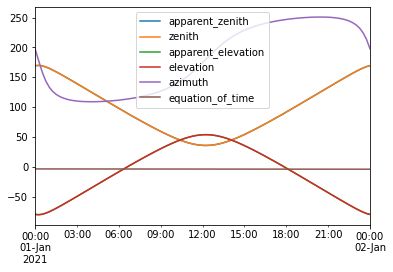

In [ ]:
times = pd.date_range(start=datetime.datetime(2021,1,1), end=datetime.datetime(2021,1,2), freq='15Min', tz=chn.tz)

solpos = pvlib.solarposition.get_solarposition(times, chn.latitude, chn.longitude)
print(solpos.head())
solpos.plot();

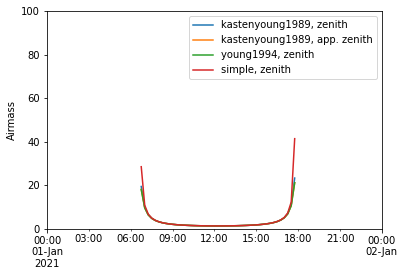

In [ ]:
pvlib.atmosphere.get_relative_airmass(solpos['zenith']).plot(label='kastenyoung1989, zenith')
pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith']).plot(label='kastenyoung1989, app. zenith')
pvlib.atmosphere.get_relative_airmass(solpos['zenith'], model='young1994').plot(label='young1994, zenith')
pvlib.atmosphere.get_relative_airmass(solpos['zenith'], model='simple').plot(label='simple, zenith')
plt.legend()
plt.ylabel('Airmass')
plt.ylim(0,100);

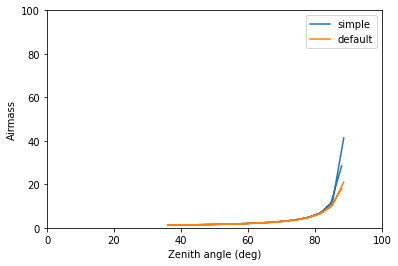

In [ ]:
plt.plot(solpos['zenith'], pvlib.atmosphere.get_relative_airmass(solpos['zenith'], model='simple'), label='simple')
plt.plot(solpos['zenith'], pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith']), label='default')
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('Zenith angle (deg)')
plt.ylabel('Airmass')
plt.legend();

In [ ]:
from pvlib.soiling import 